In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

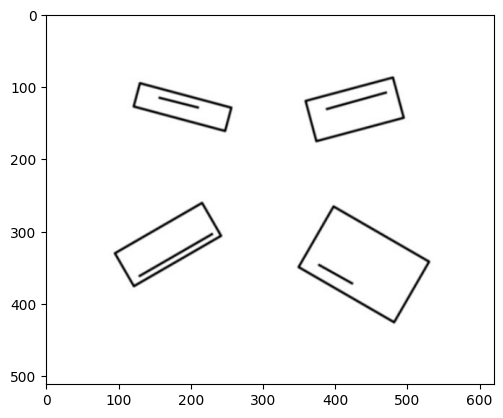

In [2]:
image = cv.imread('rect.jpg')
plt.imshow(image)

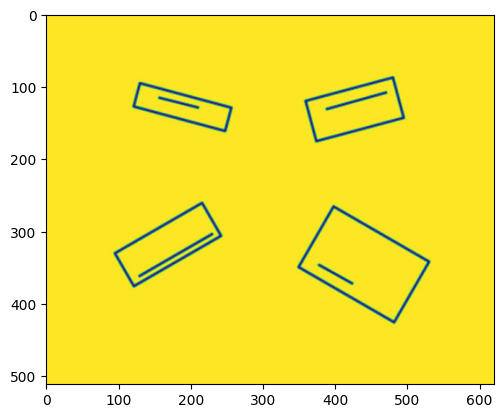

In [3]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Grayscale the image
plt.imshow(gray)

# Task 1

Assign the number (1 to 4) below the image of the rectangle with respect to its length inside the rectangle. The shorter the line lower the number (No need to reorder the image of the rectangle, only give numbering)

## Solution


- Detect rectangle
    - Use a rectangle detection algorithm (e.g., contour detection or Hough transform) to identify the rectangles in the image

- Detect lines inside rectangles
    - Use Hough transform for line detection

- Measure line lengths
    - Calculate the length of each detected line

- Index rectangles based on line lengths
    - Sort rectangles based on the lengths of the lines contained within them
    - Assign smaller indices to rectangles with shorter lines

In [4]:
ret,thresh = cv.threshold(gray,200,255,cv.THRESH_BINARY)
# threshold returns ret and thresh, thresh is image and ret is threshold value use. Binary thresholding is used

contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# APPROX NONE gives all coordinates while APPROX SIMPLE gives only vertices of found contours
# retrieval mode controls how or where to find contours, RETR_TREE makes hirerchial tree like structure for finding contours

print(len(contours))

13


In [5]:
# It created 13 level of hirearchy

In [6]:
contours[0] # most likely outermost parts of contours as per hirearchy # obtained when we use RETR_EXTERNAL

array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32)

In [7]:
# contours[1:] # inner contours within image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
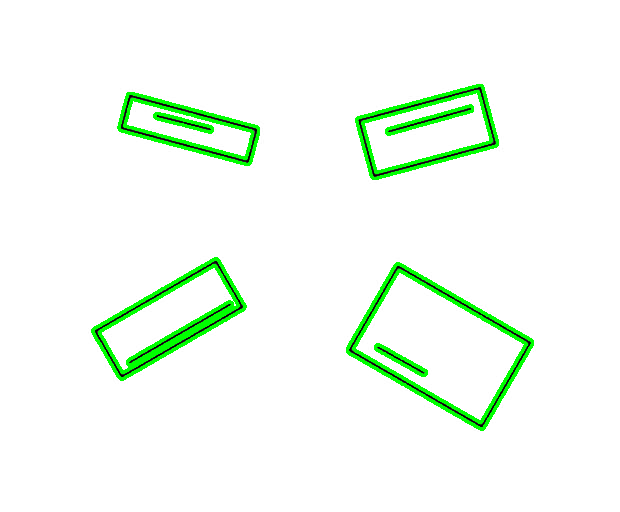

In [8]:
contour_image = image.copy()
cv.drawContours(contour_image, contours[1:], -1, (0, 255, 0), 2)

In [9]:
contours = contours[1:]

In [10]:
## Find rectangles and lines

In [11]:
for i, contour in enumerate(contours):
    # Print contour index
    print(f"Contour {i}:")

    # Print number of points
    print(f"Number of Points: {len(contour)}")

    # Calculate area of contour
    area = cv.contourArea(contour)
    print(f"Area: {area}")

    # Calculate perimeter of contour
    perimeter = cv.arcLength(contour, True)
    print(f"Perimeter: {perimeter}")

    # Calculate bounding rectangle
    x, y, w, h = cv.boundingRect(contour)
    print(f"Bounding Rectangle: (x={x}, y={y}, w={w}, h={h})")

    # Calculate aspect ratio of bounding rectangle
    aspect_ratio = float(w) / h
    print(f"Aspect Ratio: {aspect_ratio}")

    vertices = cv.approxPolyDP(contour, 0.04 * cv.arcLength(contour, True), True)
    num_vertices = len(vertices)
    print(f"Number of vertices: {num_vertices}")


    # Print newline for separation
    print()

Contour 0:
Number of Points: 446
Area: 16164.0
Perimeter: 552.0386657714844
Bounding Rectangle: (x=347, y=263, w=186, h=167)
Aspect Ratio: 1.1137724550898203
Number of vertices: 4

Contour 1:
Number of Points: 412
Area: 13445.0
Perimeter: 510.5828220844269
Bounding Rectangle: (x=353, y=270, w=174, h=153)
Aspect Ratio: 1.1372549019607843
Number of vertices: 4

Contour 2:
Number of Points: 106
Area: 306.0
Perimeter: 130.02438521385193
Bounding Rectangle: (x=375, y=344, w=52, h=32)
Aspect Ratio: 1.625
Number of vertices: 2

Contour 3:
Number of Points: 346
Area: 8393.0
Perimeter: 429.6711347103119
Bounding Rectangle: (x=92, y=258, w=154, h=122)
Aspect Ratio: 1.2622950819672132
Number of vertices: 4

Contour 4:
Number of Points: 312
Area: 6311.0
Perimeter: 386.55843687057495
Bounding Rectangle: (x=99, y=265, w=140, h=108)
Aspect Ratio: 1.2962962962962963
Number of vertices: 4

Contour 5:
Number of Points: 214
Area: 653.0
Perimeter: 265.36247873306274
Bounding Rectangle: (x=127, y=301, w=10

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
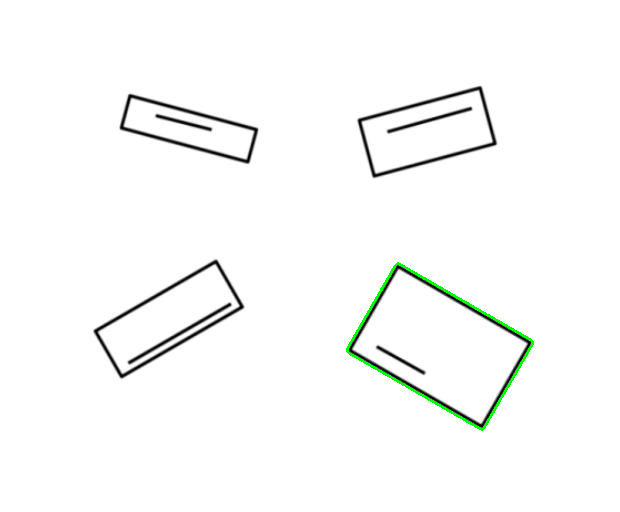

In [12]:
contour_image = image.copy()
cv.drawContours(contour_image, contours[0], -1, (0, 255, 0), 2)

It was identified that contours 2, 5, 8, 11 are lines. As we can see they have area less than 1000 and most definately via the number of vertices. We can use this as defining criteria for lines vs rectangles.


Also, we can directly compare perimeters of lines to get the order of lines and hence of rectangles.

In [13]:
rectangles = []
lines = []

def get_shape(contour):
    # Calculate area of contour
    area = cv.contourArea(contour)

    vertices = cv.approxPolyDP(contour, 0.04 * cv.arcLength(contour, True), True)
    num_vertices = len(vertices)

    if area<1000 and num_vertices<3:
      return 'Line'
    else: return 'Rectangle'



for contour in contours:
    shape = get_shape(contour)
    if shape == 'Rectangle':
      rectangles.append(contour)
    elif shape == 'Line':
        lines.append(contour)
    else:
      pass

# ALso there are 2 contours for each reactangles, one showing outer part and another for inner part of each rectangle
len(rectangles), len(lines)

(8, 4)

In [14]:
# Let's take outer ones only
outer = []
for i in range(0,8,2):
  rectangle=rectangles[i]
  outer.append(rectangle)

print(len(outer))

4


Now using perimeter to order lines and rectangles.

In [15]:
peri_dict = {}

for i, contour in enumerate(lines):
  perimeter = cv.arcLength(contour, True)
  print(f"Perimeter of contour {i+1}: {perimeter}")
  peri_dict[i+1] = perimeter

print()
peri_dict

Perimeter of contour 1: 130.02438521385193
Perimeter of contour 2: 265.36247873306274
Perimeter of contour 3: 133.49747383594513
Perimeter of contour 4: 198.95331752300262



{1: 130.02438521385193,
 2: 265.36247873306274,
 3: 133.49747383594513,
 4: 198.95331752300262}

In [16]:
# sorting according to perimeter
peri_dict = {k: v for k, v in sorted(peri_dict.items(), key=lambda item: item[1])}
peri_dict

{1: 130.02438521385193,
 3: 133.49747383594513,
 4: 198.95331752300262,
 2: 265.36247873306274}

In [17]:
ranks = ['1st', '2nd','3rd', '4th' ]
i=0
for idx, val in peri_dict.items():
  peri_dict[idx] = [val,ranks[i]]
  i+=1

peri_dict

{1: [130.02438521385193, '1st'],
 3: [133.49747383594513, '2nd'],
 4: [198.95331752300262, '3rd'],
 2: [265.36247873306274, '4th']}

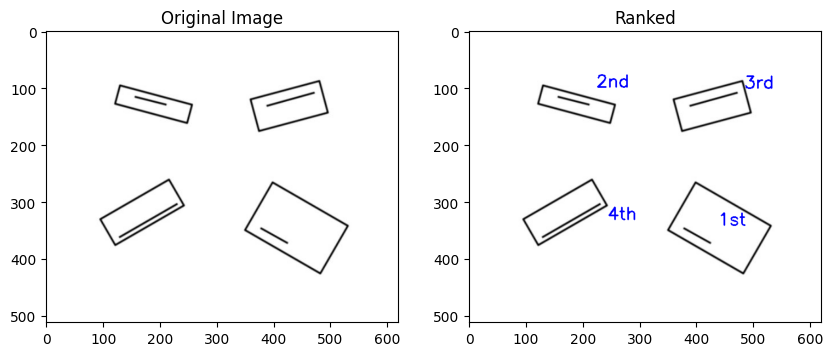

In [18]:
img = image.copy()
for i, contour in enumerate(lines):
    perimeter = peri_dict[i+1][0]  # Get the perimeter value for the current contour
    x, y, w, h = cv.boundingRect(contour)  # Get the bounding rectangle coordinates

    text = peri_dict[i+1][1]

    # Calculate the position for placing the text beside the rectangle
    text_position = (x + w + 10, y + h-35)

    # Draw the text on the image
    cv.putText(img, text, text_position, cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1,2,2)
plt.title("Ranked")
plt.imshow(img)

plt.show()

# TASK 2

Align(make the rectangle image straight) all the given images of the rectangle.

In [19]:
img = image.copy()

In [20]:
height,width = image.shape[:2]

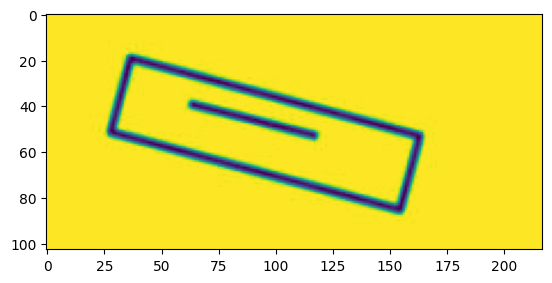

In [21]:
# Top Left

start_row, start_col = int(height*.15), int(width*.15)
end_row, end_col = int(height * .35), int(width*.5)

top_left = image[start_row:end_row , start_col:end_col]
top_left = cv.cvtColor(top_left, cv.COLOR_BGR2GRAY)

plt.imshow(top_left)

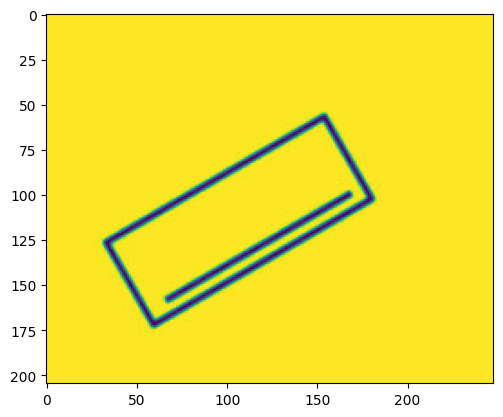

In [22]:
# Bottom Left

start_row, start_col = int(height*.4), int(width*.10)
end_row, end_col = int(height * .8), int(width*.5)

bottom_left = image[start_row:end_row , start_col:end_col]
bottom_left = cv.cvtColor(bottom_left, cv.COLOR_BGR2GRAY)
plt.imshow(bottom_left)

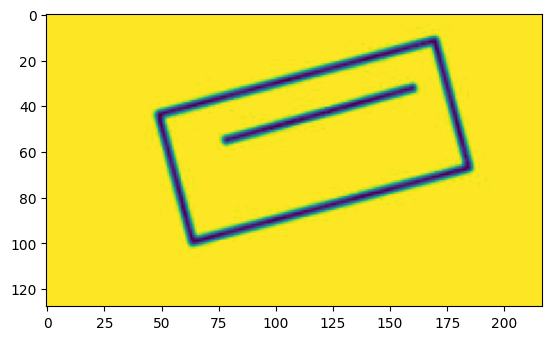

In [23]:
# Top Right

start_row, start_col = int(height*.15), int(width*.5)
end_row, end_col = int(height * .4), int(width*.85)

top_right = image[start_row:end_row , start_col:end_col]
top_right = cv.cvtColor(top_right, cv.COLOR_BGR2GRAY)
plt.imshow(top_right)

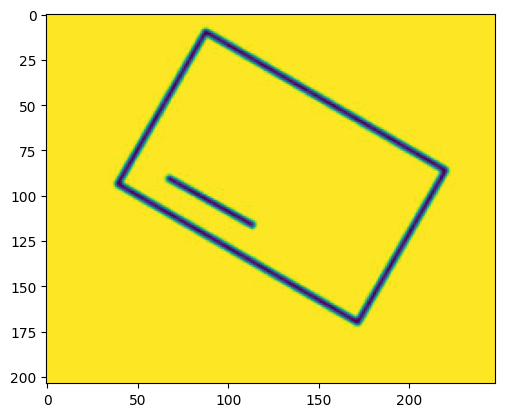

In [24]:
# Bottom Right

start_row, start_col = int(height*.5), int(width*.5)
end_row, end_col = int(height * .9), int(width*.9)

bottom_right = image[start_row:end_row , start_col:end_col]
bottom_right = cv.cvtColor(bottom_right, cv.COLOR_BGR2GRAY)
plt.imshow(bottom_right)

Top Left Rectangle

In [25]:
# ret, thresh = cv.threshold(top_left, 200, 255, cv.THRESH_BINARY)
# contours, heirarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# for i in range(1,len(contours)):
#     cv.drawContours(top_left, contours[i], -1, (250,100,100), 2)

# plt.figure(figsize=[6,3])
# plt.imshow(top_left)
# plt.show()

In [26]:
# height, width = top_left.shape[:2]
# center = (width/2, height/2)

# rotate_matrix = cv.getRotationMatrix2D(center=center, angle=15, scale=1)

# rotated_image = cv.warpAffine(src=top_left, M=rotate_matrix, dsize=(width, height))

In [27]:
# plt.figure(figsize=[6,3])
# plt.imshow(top_left)

# plt.figure(figsize=[6,3])
# plt.imshow(rotated_image)

# plt.show()

In [28]:
# rotated_image = cv.cvtColor(rotated_image, cv.COLOR_GRAY2BGR)
# plt.imshow(rotated_image)
# plt.show()

In [29]:
def rect_alignment(images:list, titles:list, angles:list):

  fig, axes = plt.subplots(len(images), 2, figsize=(20, 20))

  for i, (img, title,angle) in enumerate(zip(images, titles,angles)):

    # Threshold image
    ret, thresh = cv.threshold(img, 150, 255, cv.THRESH_BINARY)

    # Find Contours
    contours, heirarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    # Draw Contour
    for j in range(1,len(contours)):
        cv.drawContours(img, contours[j], -1, (0,255,0), 1)

    # Get center coordinates of the image
    height, width = img.shape[:2]
    center = (width/2, height/2)

    # Get rotation Matrix
    rotate_matrix = cv.getRotationMatrix2D(center=center, angle=angle, scale=1)
    # Rotate Image
    rotated_image = cv.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

    # Plot original Image
    axes[i, 0].imshow(cv.cvtColor(img, cv.COLOR_GRAY2BGR))  # Convert BGR to RGB for plotting
    axes[i, 0].set_title(f"Original Image: {title}")

    # Plot rotated image
    axes[i, 1].imshow(cv.cvtColor(rotated_image, cv.COLOR_GRAY2BGR))  # Convert BGR to RGB for plotting
    axes[i, 1].set_title(f"Rotated image: {title}")

  plt.tight_layout()
  plt.show()

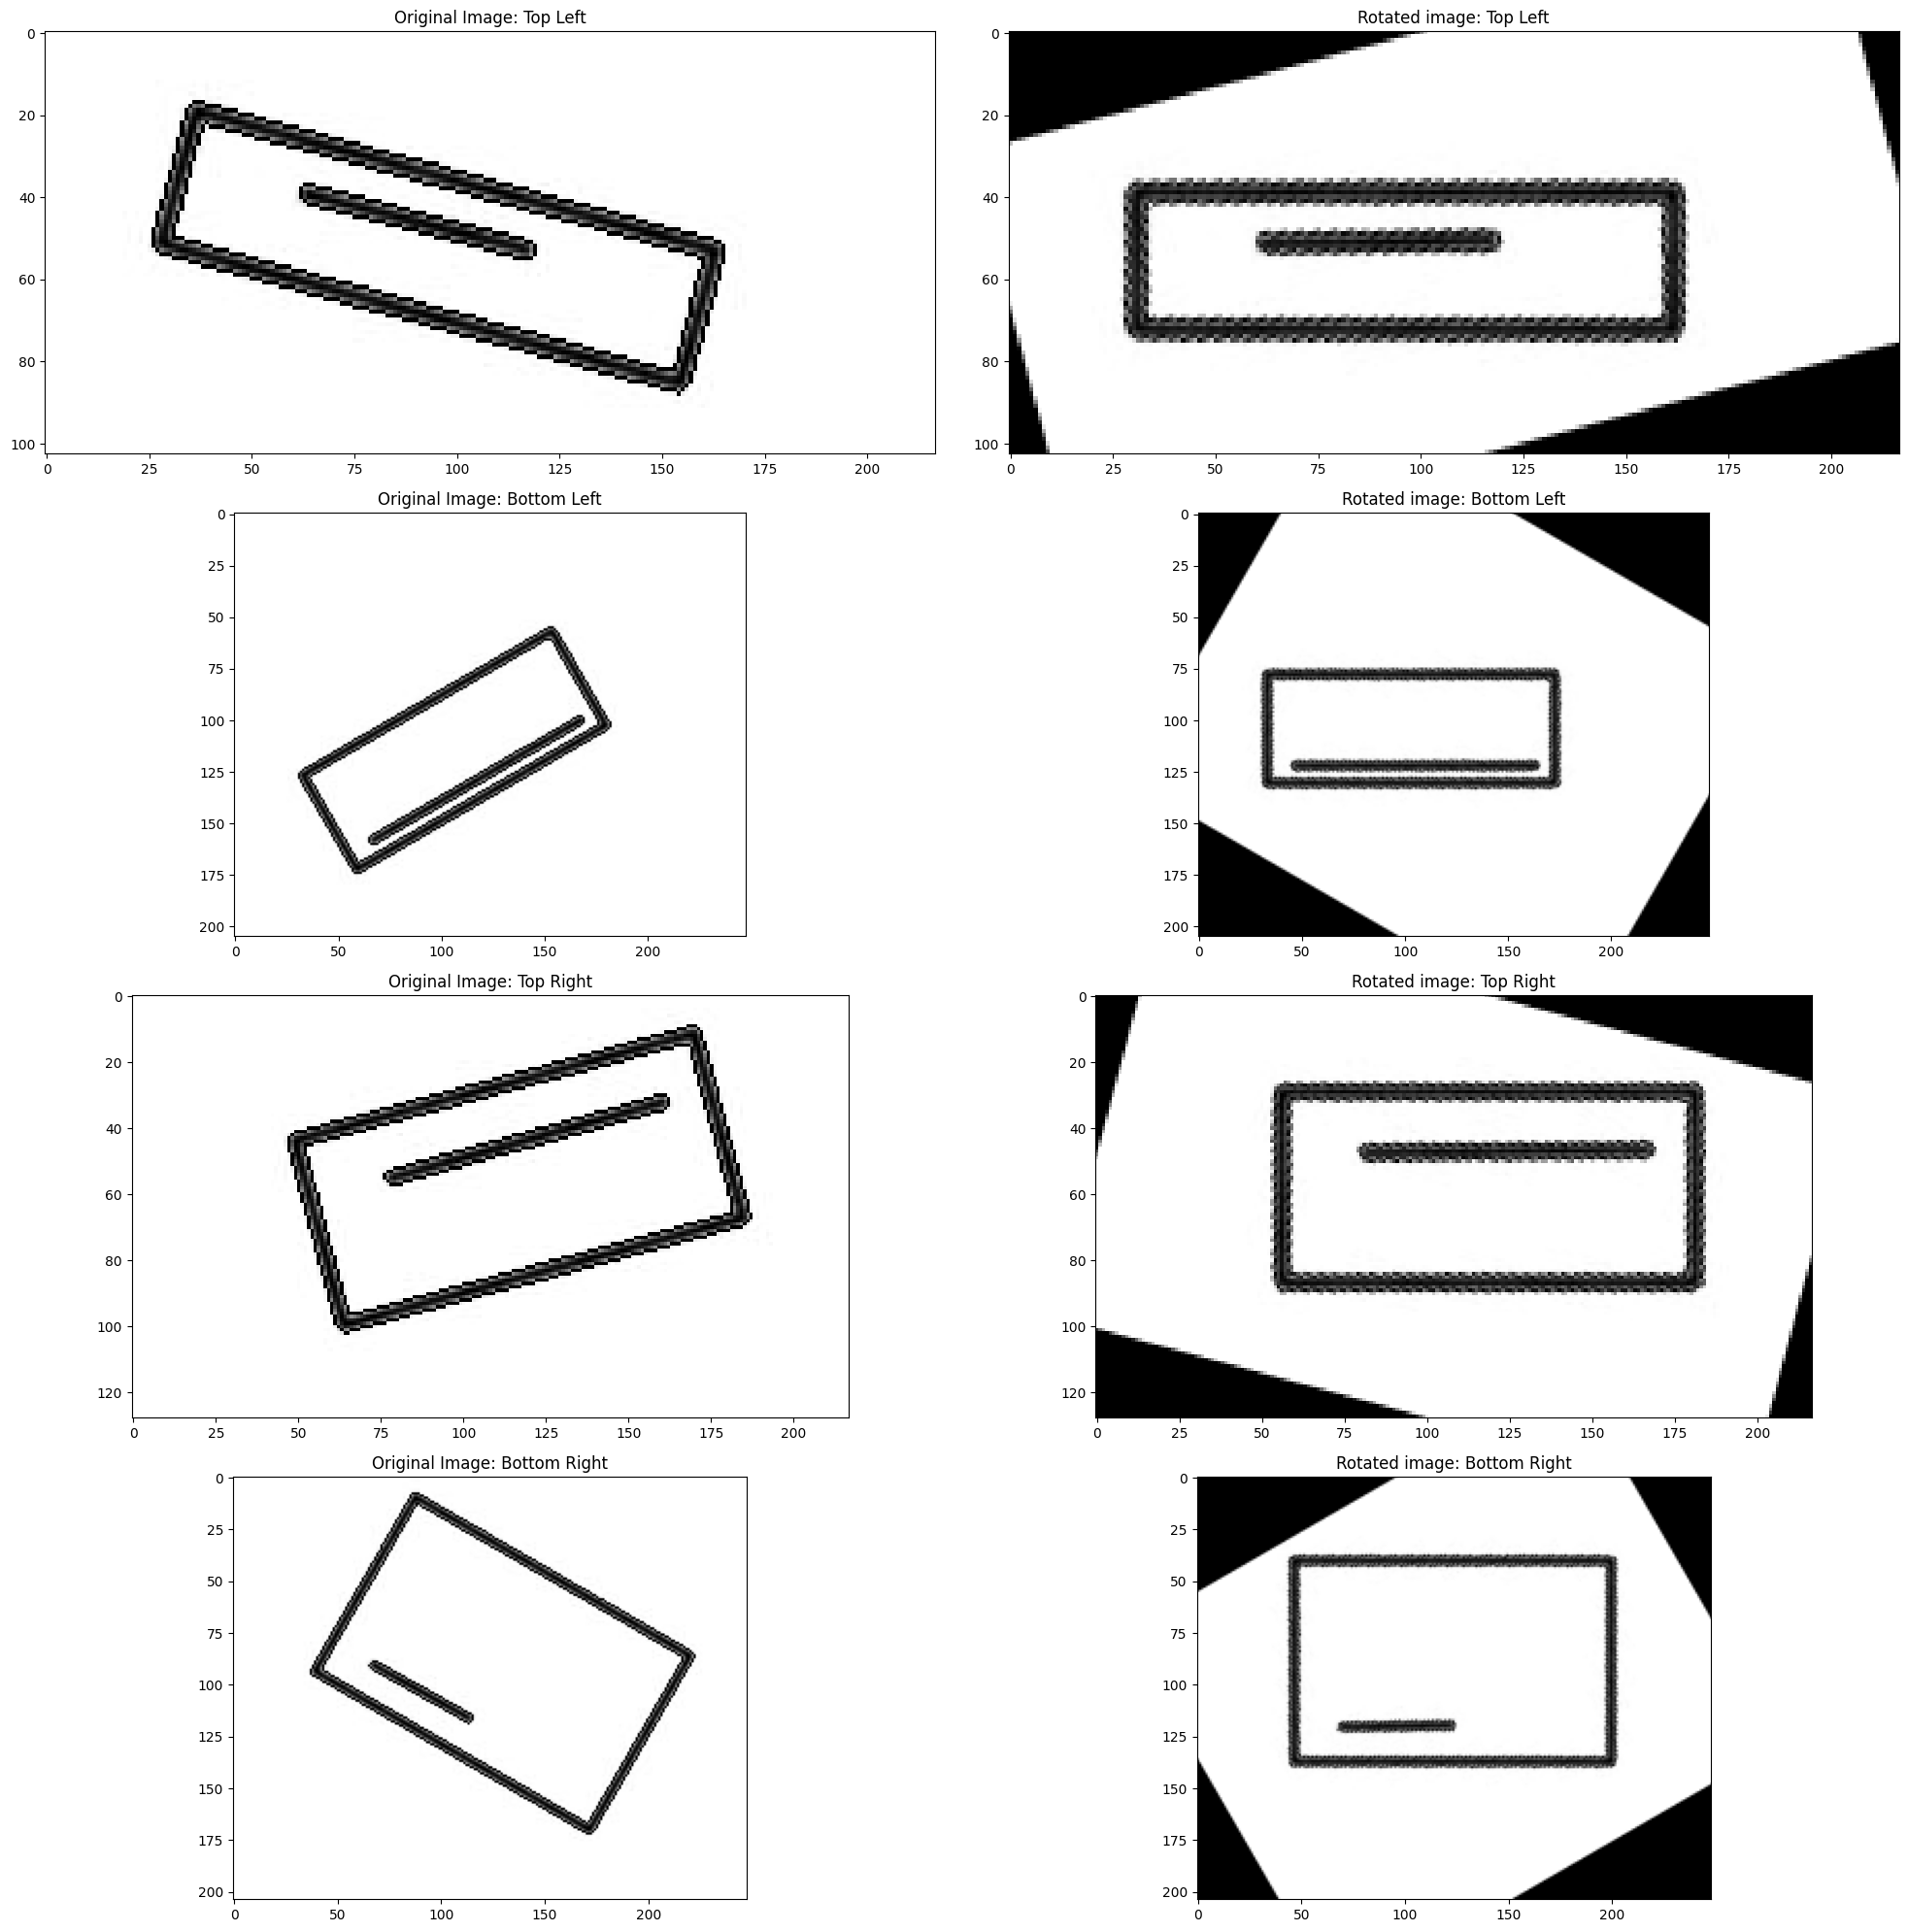

In [30]:
images = [top_left.copy(), bottom_left.copy(), top_right.copy(), bottom_right.copy()]
titles = ["Top Left", "Bottom Left", "Top Right", "Bottom Right"]
angles=[15, -30,-15,30]

rect_alignment(images, titles,angles)